In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

C:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
aaa = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/aaa.pkl')
bbb = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/bbb.pkl')
ccc = pd.read_pickle('C:/Users/ewpadmin/JIHYUN/ccc.pkl')

In [3]:
def model_rf(X, y, test_dataset, site):
    
    sc = MinMaxScaler()
    X_train = sc.fit_transform(X)
    test_dataset = sc.transform(test_dataset)
    y_train = y
#     y_train = sc.fit_transform(y)

    
    rfModel = RandomForestRegressor(n_estimators=50, max_features=15, max_depth=50,# min_samples_split=3,min_samples_leaf=2,
                                    verbose=1, random_state=0)
    rfModel.fit(X_train, y_train)

    y_pred = rfModel.predict(test_dataset)
    
#     y_pred = sc.inverse_transform(y_pred.reshape(y_pred.shape[0], 1))
    print(len(y_pred))
    return rfModel,y_pred

In [4]:
forecast_final = pd.read_pickle('C:/Users/ewpadmin/KMS/forecast_2nd.pkl')

In [5]:
# forecast_final = pd.read_pickle('C:/Users/ewpadmin/KMS/forecast_2nd_quad.pkl')

In [6]:
forecast_final.head(3)

,time,month,day,hour,minute,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
0,2019-03-05 09:00:00,3,5,9,0,6.000000,2.0,10.0,0.0,0.0,90.0,3.000000,4.000000,21.98,116.80,157.000000
1,2019-03-05 09:15:00,3,5,9,15,6.583333,2.0,10.0,0.0,0.0,87.5,2.916667,4.083333,24.61,119.66,156.409771
2,2019-03-05 09:30:00,3,5,9,30,7.166667,2.0,10.0,0.0,0.0,85.0,2.833333,4.166667,27.17,122.67,155.866251


In [7]:
forecast_final.describe()

,temperature_3H,sky,rainfall_probability,rainfall,snow,humidity,wind_speed,wind_direction,Elevation_angle,Azimuth_angle,dust_132
count,253.000000,253.000000,253.000000,253.0,253.0,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,8.035573,2.496047,14.960474,0.0,0.0,59.930830,2.426877,5.142292,-1.249091,193.755217,136.216196
std,2.618183,0.751421,7.514212,0.0,0.0,11.750896,1.246481,1.715218,36.034994,92.152758,21.589393
min,3.000000,1.000000,0.000000,0.0,0.0,35.000000,1.000000,0.000000,-58.970000,6.990000,67.000000
25%,6.166667,2.000000,10.000000,0.0,0.0,51.250000,1.083333,4.333333,-35.650000,113.800000,136.970685
50%,8.083333,3.000000,20.000000,0.0,0.0,60.416667,2.250000,5.666667,2.630000,206.430000,137.001255
75%,10.000000,3.000000,20.000000,0.0,0.0,70.000000,3.666667,6.250000,32.800000,270.250000,153.752597
max,13.000000,3.000000,20.000000,0.0,0.0,90.000000,5.000000,7.000000,47.570000,359.890000,158.450769


In [8]:
df_name = [aaa, bbb, ccc]
for col in df_name:
    col.Elevation_angle = col.Elevation_angle.astype('category')
    col.Azimuth_angle = col.Azimuth_angle.astype('category')

In [9]:
forecast_final.rainfall = forecast_final.rainfall.abs()
forecast_final.rainfall_probability = forecast_final.rainfall_probability.abs()
forecast_final.snow = forecast_final.snow.abs()

In [10]:
col_list = ['month', 'day', 'hour', 'minute', 'temperature_3H', 'sky', 'rainfall_probability', 'rainfall', 'snow',
            'humidity', 'wind_speed', 'wind_direction', 'dust_132', 'Elevation_angle', 'Azimuth_angle']

In [11]:
aaa.columns[3], aaa.columns[4]

('real_time_power', 'day_power')

In [12]:
aaa.dtypes

time                    datetime64[ns]
solar1                          object
solar2                          object
real_time_power                float64
day_power                      float64
month                         category
day                           category
hour                          category
minute                        category
temperature_3H                 float64
sky                            float64
rainfall_probability           float64
rainfall                       float64
snow                           float64
humidity                       float64
wind_speed                     float64
wind_direction                category
Elevation_angle               category
Azimuth_angle                 category
dust_132                       float64
dtype: object

In [13]:
forecast_final.dtypes

time                    datetime64[ns]
month                         category
day                           category
hour                          category
minute                        category
temperature_3H                 float64
sky                            float64
rainfall_probability           float64
rainfall                       float64
snow                           float64
humidity                       float64
wind_speed                     float64
wind_direction                 float64
Elevation_angle                float64
Azimuth_angle                  float64
dust_132                       float64
dtype: object

In [14]:
modela,pre_aaa = model_rf(aaa[col_list], aaa[[aaa.columns[3]]], forecast_final[col_list], 'A_site')
modelb,pre_bbb = model_rf(bbb[col_list], bbb[[bbb.columns[3]]], forecast_final[col_list], 'B_site')
modelc,pre_ccc = model_rf(ccc[col_list], ccc[[ccc.columns[3]]], forecast_final[col_list], 'C_site')

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


253


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   11.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


253
253


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


<BarContainer object of 15 artists>

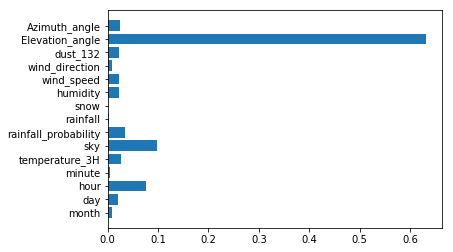

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
yyyy = modela.feature_importances_
plt.barh(col_list,yyyy)

In [16]:
pred_idx = pd.date_range(start='2019-03-05 09:00:00', end='2019-03-08 00:00:00', freq='15Min')
len(pd.date_range(start='2019-03-05 09:00:00', end='2019-03-08 00:00:00', freq='15Min'))

253

In [17]:
predict = pd.concat([pd.DataFrame(pre_aaa, columns=['A_site'], index=pred_idx),
                     pd.DataFrame(pre_bbb, columns=['B_site'], index=pred_idx),
                     pd.DataFrame(pre_ccc, columns=['C_site'], index=pred_idx)], axis=1)

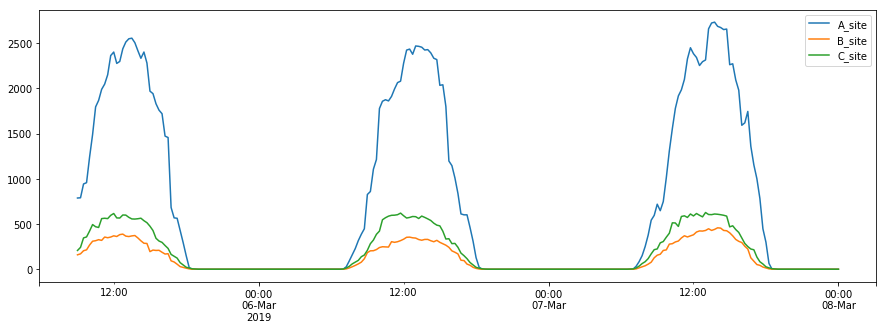

In [18]:
%matplotlib inline
predict.plot(figsize=(15,5))

In [19]:
predict.head(50)

,A_site,B_site,C_site
2019-03-05 09:00:00,787.417140,159.709529,207.571129
2019-03-05 09:15:00,790.144037,170.312077,241.827991
2019-03-05 09:30:00,942.765022,204.621623,346.243312
2019-03-05 09:45:00,957.008755,214.557284,357.489023
2019-03-05 10:00:00,1239.558183,267.847503,422.250944
2019-03-05 10:15:00,1489.285966,309.739610,493.958742
2019-03-05 10:30:00,1794.586282,315.562324,469.861973
2019-03-05 10:45:00,1867.074084,326.950033,461.872740
2019-03-05 11:00:00,1988.864424,319.066056,559.817749
2019-03-05 11:15:00,2046.868880,355.975979,563.755675


In [20]:
pd.DataFrame(predict).to_excel('predict_real_time_last_submission.xlsx')